# Linear Regression with Petrol Consumption Dataset


## Importing the Libraries

In [35]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics  
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Load Dataset

In [36]:
dataset = pd.read_csv('petrol_consumption.csv')
dataset.head(3)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561


## Understand and Prepare the Data

In [37]:
dataset.shape

(48, 5)

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 1.9 KB


In [39]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [40]:
dataset.columns.values

array(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'], dtype=object)

## Data Cleaning

In [41]:
dataset.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [42]:
dataset.isna().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [43]:
dataset.duplicated().sum()

0

## Visualization

In [44]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


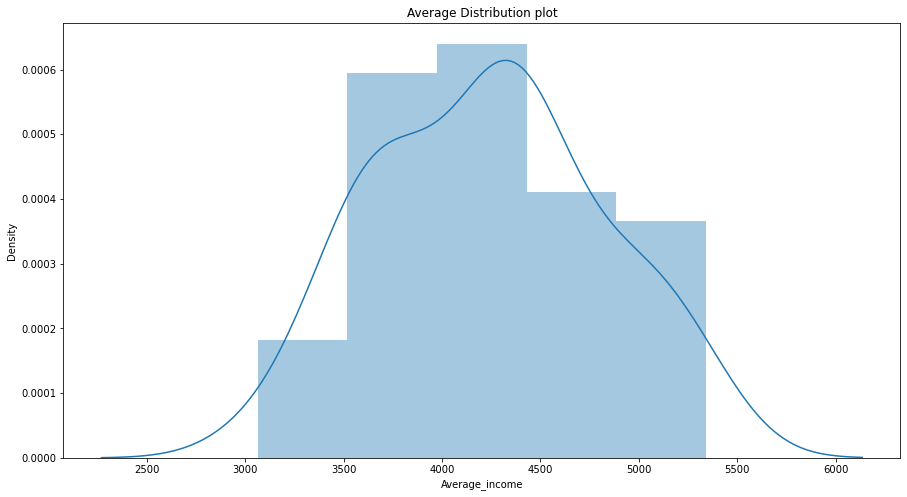

In [45]:
plt.figure(figsize=(15,8))
sns.distplot(dataset['Average_income'])
plt.title('Average Distribution plot')
plt.show()

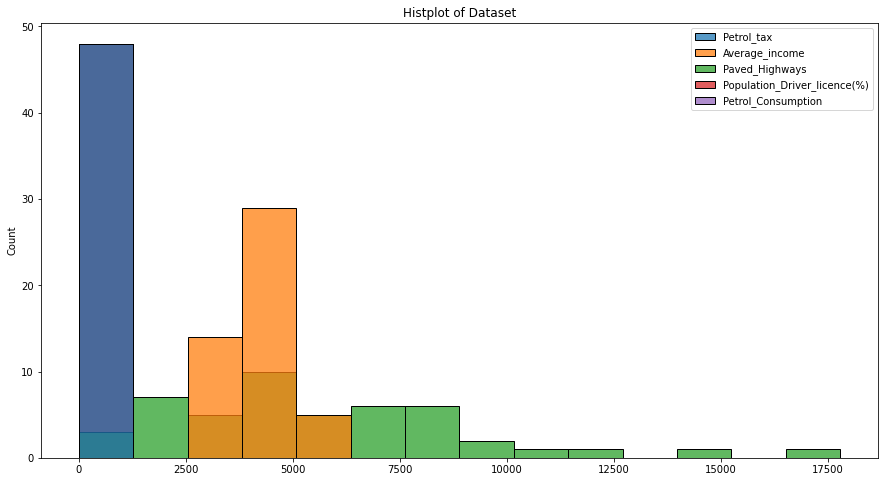

In [46]:
plt.figure(figsize=(15,8))
sns.histplot(dataset)
plt.title('Histplot of Dataset')
plt.show()

<Figure size 1080x576 with 0 Axes>

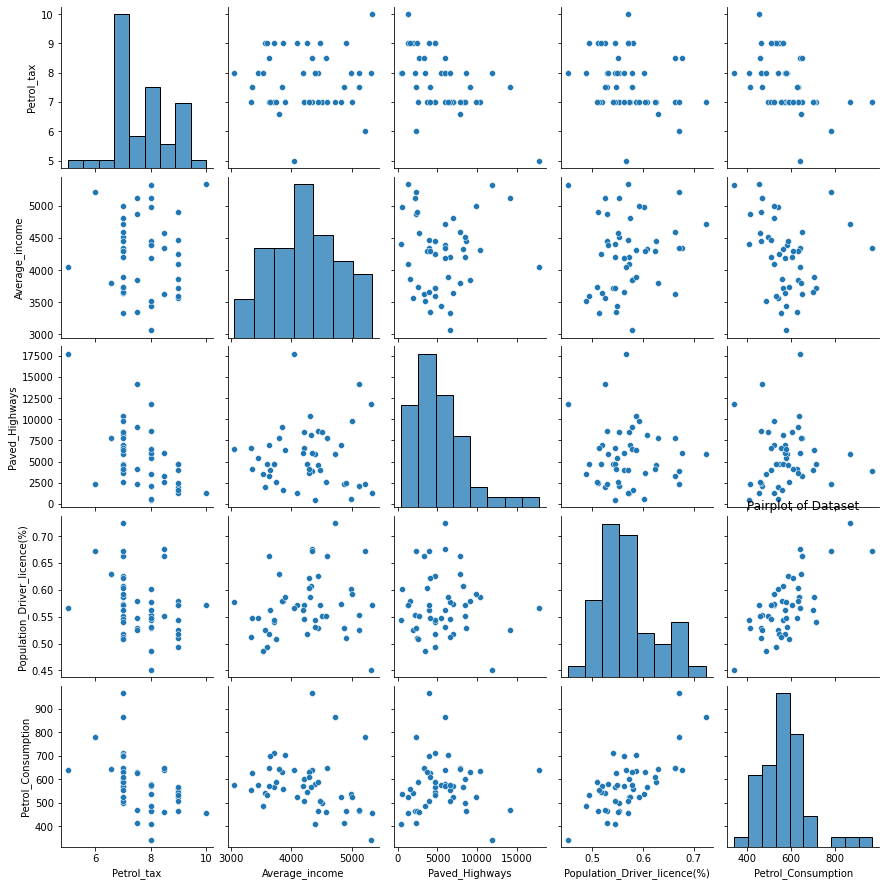

In [47]:
plt.figure(figsize=(15,8))
sns.pairplot(dataset)
plt.title('Pairplot of Dataset')
plt.show()

## Data Prepration

In [48]:
x = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways',  
       'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

## Data Scaling 

In [49]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)
print(x_train.shape)
print(x_test.shape)

(38, 4)
(10, 4)


## Linear Regression Algorithm

In [51]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)


In [52]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
29,534,470.176207
32,577,660.582660
6,344,300.891852
17,714,589.562629
19,640,707.519621
26,577,590.716039
2,561,589.093127
42,632,646.138737
3,414,483.112992
45,510,528.160999


In [53]:
print('Accuracy:', lr.score(x_test,y_test))  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy: 0.6300637535087511
Mean Absolute Error: 52.56934871451131
Mean Squared Error: 3924.509363889528
Root Mean Squared Error: 62.64590460588408
